# Importing

## Import Library

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score




# Input data files are available in the read-only "../input/" directory

import os
for dirname, _, filenames in os.walk('/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/ecommerce-customer-behavior-dataset/ecommerce_customer_churn_dataset.csv


## Import CSV And convert to DataFrame

In [ ]:
df = pd.read_csv('input/ecommerce-customer-behavior-dataset/ecommerce_customer_churn_dataset.csv')

# Preprocessing

## First five row

In [3]:
df.head()

,Age,Gender,Country,City,Membership_Years,Login_Frequency,Session_Duration_Avg,Pages_Per_Session,Cart_Abandonment_Rate,Wishlist_Items,...,Email_Open_Rate,Customer_Service_Calls,Product_Reviews_Written,Social_Media_Engagement_Score,Mobile_App_Usage,Payment_Method_Diversity,Lifetime_Value,Credit_Balance,Churned,Signup_Quarter
0,43.0,Male,France,Marseille,2.9,14.0,27.4,6.0,50.6,3.0,...,17.9,9.0,4.0,16.3,20.8,1.0,953.33,2278.0,0,Q1
1,36.0,Male,UK,Manchester,1.6,15.0,42.7,10.3,37.7,1.0,...,42.8,7.0,3.0,NaN,23.3,3.0,1067.47,3028.0,0,Q4
2,45.0,Female,Canada,Vancouver,2.9,10.0,24.8,1.6,70.9,1.0,...,0.0,4.0,1.0,NaN,8.8,NaN,1289.75,2317.0,0,Q4
3,56.0,Female,USA,New York,2.6,10.0,38.4,14.8,41.7,9.0,...,41.4,2.0,5.0,85.9,31.0,3.0,2340.92,2674.0,0,Q1
4,35.0,Male,India,Delhi,3.1,29.0,51.4,NaN,19.1,9.0,...,37.9,1.0,11.0,83.0,50.4,4.0,3041.29,5354.0,0,Q4


## last Five row

In [4]:
df.tail()

,Age,Gender,Country,City,Membership_Years,Login_Frequency,Session_Duration_Avg,Pages_Per_Session,Cart_Abandonment_Rate,Wishlist_Items,...,Email_Open_Rate,Customer_Service_Calls,Product_Reviews_Written,Social_Media_Engagement_Score,Mobile_App_Usage,Payment_Method_Diversity,Lifetime_Value,Credit_Balance,Churned,Signup_Quarter
49995,38.0,Female,USA,Los Angeles,10.0,10.0,35.8,8.8,51.2,3.0,...,9.2,5.0,1.0,20.7,25.2,1.0,2365.98,3499.0,0,Q2
49996,37.0,Male,USA,Chicago,1.4,21.0,32.4,9.6,32.5,2.0,...,17.6,5.0,3.0,38.6,12.1,4.0,1293.60,3154.0,0,Q3
49997,44.0,Female,USA,Phoenix,2.8,19.0,40.3,10.4,50.6,1.0,...,25.2,4.0,6.0,59.9,NaN,1.0,1655.28,1622.0,0,Q1
49998,41.0,Female,USA,Chicago,2.9,17.0,29.9,10.1,60.8,1.0,...,34.6,5.0,2.0,NaN,14.1,3.0,1286.11,2634.0,0,Q2
49999,56.0,Male,UK,Leeds,2.2,2.0,18.2,NaN,46.0,0.0,...,0.0,7.0,0.0,0.0,4.2,1.0,1072.61,612.0,0,Q3


## Shape of our dataset

In [5]:
df.shape

(50000, 25)

## List out all columns

In [6]:
df.columns

Index(['Age', 'Gender', 'Country', 'City', 'Membership_Years',
       'Login_Frequency', 'Session_Duration_Avg', 'Pages_Per_Session',
       'Cart_Abandonment_Rate', 'Wishlist_Items', 'Total_Purchases',
       'Average_Order_Value', 'Days_Since_Last_Purchase',
       'Discount_Usage_Rate', 'Returns_Rate', 'Email_Open_Rate',
       'Customer_Service_Calls', 'Product_Reviews_Written',
       'Social_Media_Engagement_Score', 'Mobile_App_Usage',
       'Payment_Method_Diversity', 'Lifetime_Value', 'Credit_Balance',
       'Churned', 'Signup_Quarter'],
      dtype='object')

## Datatype of each columns

In [7]:
df.dtypes

Age                              float64
Gender                            object
Country                           object
City                              object
Membership_Years                 float64
Login_Frequency                  float64
Session_Duration_Avg             float64
Pages_Per_Session                float64
Cart_Abandonment_Rate            float64
Wishlist_Items                   float64
Total_Purchases                  float64
Average_Order_Value              float64
Days_Since_Last_Purchase         float64
Discount_Usage_Rate              float64
Returns_Rate                     float64
Email_Open_Rate                  float64
Customer_Service_Calls           float64
Product_Reviews_Written          float64
Social_Media_Engagement_Score    float64
Mobile_App_Usage                 float64
Payment_Method_Diversity         float64
Lifetime_Value                   float64
Credit_Balance                   float64
Churned                            int64
Signup_Quarter  

## Information of all Columns

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            47505 non-null  float64
 1   Gender                         50000 non-null  object 
 2   Country                        50000 non-null  object 
 3   City                           50000 non-null  object 
 4   Membership_Years               50000 non-null  float64
 5   Login_Frequency                50000 non-null  float64
 6   Session_Duration_Avg           46601 non-null  float64
 7   Pages_Per_Session              47000 non-null  float64
 8   Cart_Abandonment_Rate          50000 non-null  float64
 9   Wishlist_Items                 46000 non-null  float64
 10  Total_Purchases                50000 non-null  float64
 11  Average_Order_Value            50000 non-null  float64
 12  Days_Since_Last_Purchase       47000 non-null 

## Check Null Value

In [9]:
df.isnull().sum().sort_values(ascending=False)

Social_Media_Engagement_Score    6000
Credit_Balance                   5500
Mobile_App_Usage                 5000
Returns_Rate                     4491
Wishlist_Items                   4000
Product_Reviews_Written          3500
Discount_Usage_Rate              3500
Session_Duration_Avg             3399
Pages_Per_Session                3000
Days_Since_Last_Purchase         3000
Email_Open_Rate                  2528
Payment_Method_Diversity         2500
Age                              2495
Customer_Service_Calls            168
Gender                              0
Country                             0
Membership_Years                    0
Cart_Abandonment_Rate               0
Login_Frequency                     0
City                                0
Average_Order_Value                 0
Total_Purchases                     0
Lifetime_Value                      0
Churned                             0
Signup_Quarter                      0
dtype: int64

## Drop High Count Null Values

In [10]:
df.drop(columns=[
    'Social_Media_Engagement_Score',
    'Mobile_App_Usage',
    'Credit_Balance'
], inplace=True)

In [11]:
df.isnull().sum()

Age                         2495
Gender                         0
Country                        0
City                           0
Membership_Years               0
Login_Frequency                0
Session_Duration_Avg        3399
Pages_Per_Session           3000
Cart_Abandonment_Rate          0
Wishlist_Items              4000
Total_Purchases                0
Average_Order_Value            0
Days_Since_Last_Purchase    3000
Discount_Usage_Rate         3500
Returns_Rate                4491
Email_Open_Rate             2528
Customer_Service_Calls       168
Product_Reviews_Written     3500
Payment_Method_Diversity    2500
Lifetime_Value                 0
Churned                        0
Signup_Quarter                 0
dtype: int64

## Handle Int and Float Value By Median

In [12]:
num_cols = df.select_dtypes(include=['int64','float64']).columns

for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

## Handle Categorical Column by Replace With Mode

In [13]:
cat_cols = df.select_dtypes(include='object').columns

for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

df.isnull().sum()

Age                         0
Gender                      0
Country                     0
City                        0
Membership_Years            0
Login_Frequency             0
Session_Duration_Avg        0
Pages_Per_Session           0
Cart_Abandonment_Rate       0
Wishlist_Items              0
Total_Purchases             0
Average_Order_Value         0
Days_Since_Last_Purchase    0
Discount_Usage_Rate         0
Returns_Rate                0
Email_Open_Rate             0
Customer_Service_Calls      0
Product_Reviews_Written     0
Payment_Method_Diversity    0
Lifetime_Value              0
Churned                     0
Signup_Quarter              0
dtype: int64

## Check Duplicate Value

In [14]:
df.duplicated().sum()

np.int64(0)

## Summary

In [15]:
df.describe()

,Age,Membership_Years,Login_Frequency,Session_Duration_Avg,Pages_Per_Session,Cart_Abandonment_Rate,Wishlist_Items,Total_Purchases,Average_Order_Value,Days_Since_Last_Purchase,Discount_Usage_Rate,Returns_Rate,Email_Open_Rate,Customer_Service_Calls,Product_Reviews_Written,Payment_Method_Diversity,Lifetime_Value,Churned
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000
mean,37.812800,2.984009,11.624660,27.602240,8.717542,57.079973,4.274520,13.111576,123.117330,29.265300,41.871661,6.565861,20.875388,5.679540,2.793580,2.33618,1440.626292,0.289000
std,11.535688,2.059105,7.810657,10.497234,3.663996,16.282723,3.060573,7.017312,175.569714,28.866043,20.617080,5.872081,13.890225,2.671844,2.256482,1.08465,907.249443,0.453302
min,5.000000,0.100000,0.000000,1.000000,1.000000,0.000000,0.000000,-13.000000,26.380000,0.000000,0.240000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000
25%,30.000000,1.400000,6.000000,20.200000,6.200000,46.400000,2.000000,8.000000,87.050000,9.000000,26.500000,3.100000,10.500000,4.000000,1.000000,2.00000,789.817500,0.000000
50%,38.000000,2.500000,11.000000,26.800000,8.400000,58.100000,4.000000,12.000000,112.970000,21.000000,40.200000,5.400000,19.700000,5.000000,2.000000,2.00000,1243.415000,0.000000
75%,45.000000,4.000000,17.000000,34.000000,11.000000,68.700000,6.000000,17.000000,144.440000,39.000000,55.560000,8.600000,29.700000,7.000000,4.000000,3.00000,1874.000000,1.000000
max,200.000000,10.000000,46.000000,75.600000,24.100000,143.743350,28.000000,128.700000,9666.379178,287.000000,116.640000,99.615734,91.700000,21.000000,21.000000,5.00000,8987.240000,1.000000


# EDA

In [16]:
def show_fig():
    plt.tight_layout()
    plt.show()

plot_no = 1

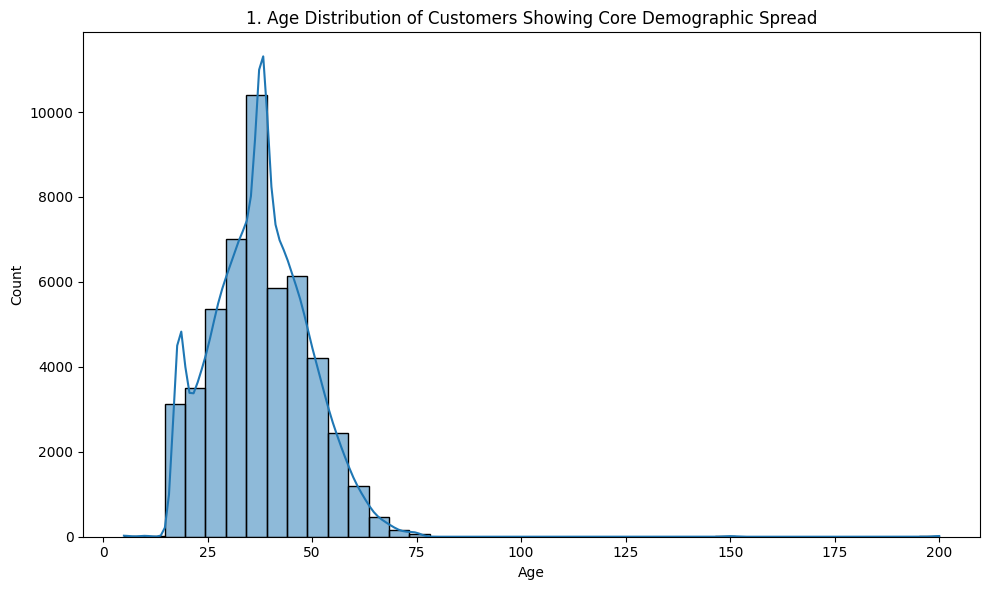

In [17]:
fig = plt.figure(figsize=(10,6))
sns.histplot(df['Age'], bins=40, kde=True)
plt.title(f'{plot_no}. Age Distribution of Customers Showing Core Demographic Spread')
show_fig()
plot_no += 1


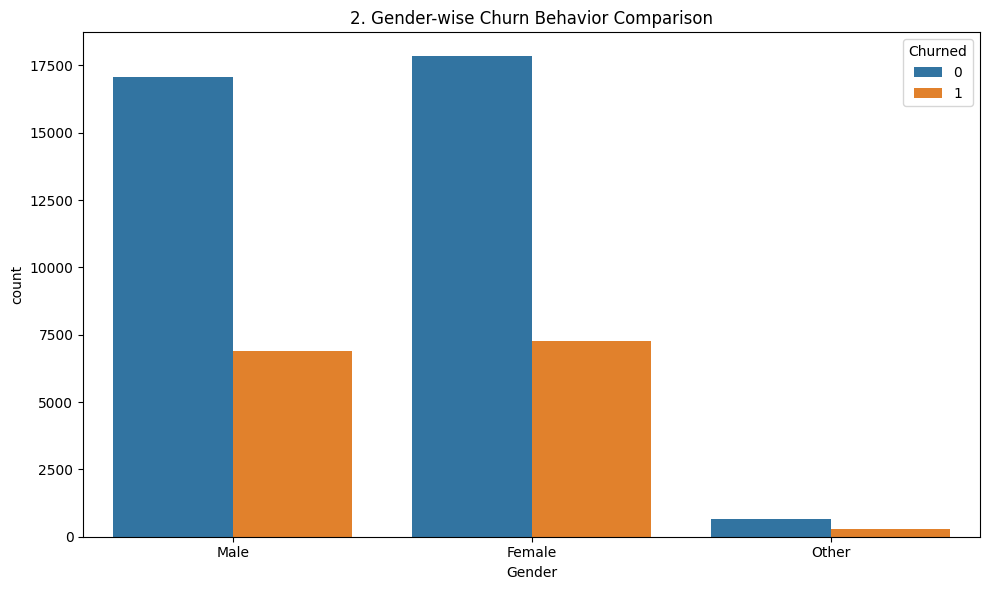

In [18]:
fig = plt.figure(figsize=(10,6))
sns.countplot(x='Gender', hue='Churned', data=df)
plt.title(f'{plot_no}. Gender-wise Churn Behavior Comparison')
show_fig()
plot_no += 1


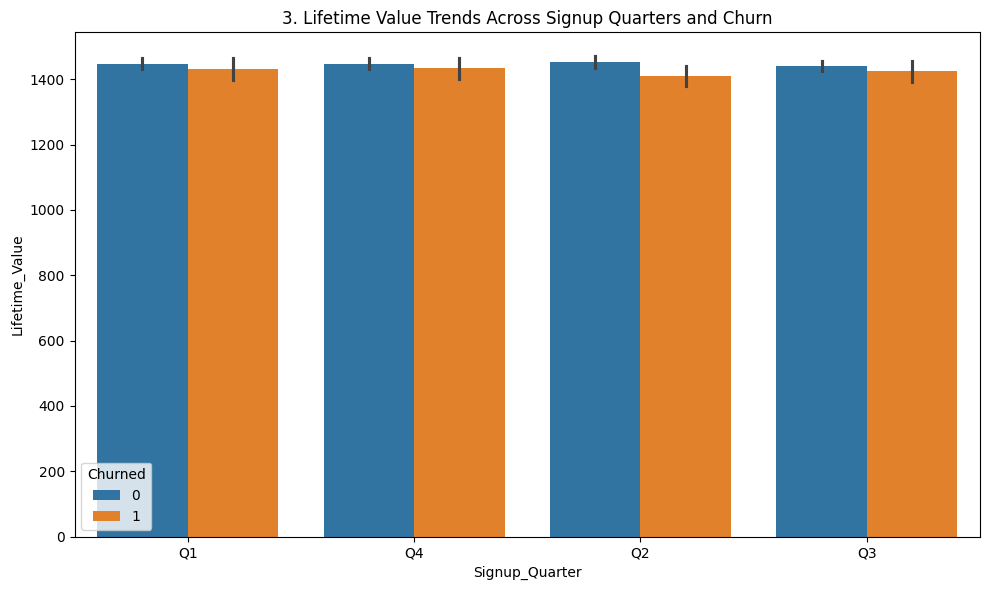

In [19]:
fig = plt.figure(figsize=(10,6))
sns.barplot(x='Signup_Quarter', y='Lifetime_Value', hue='Churned', data=df)
plt.title(f'{plot_no}. Lifetime Value Trends Across Signup Quarters and Churn')
show_fig()
plot_no += 1


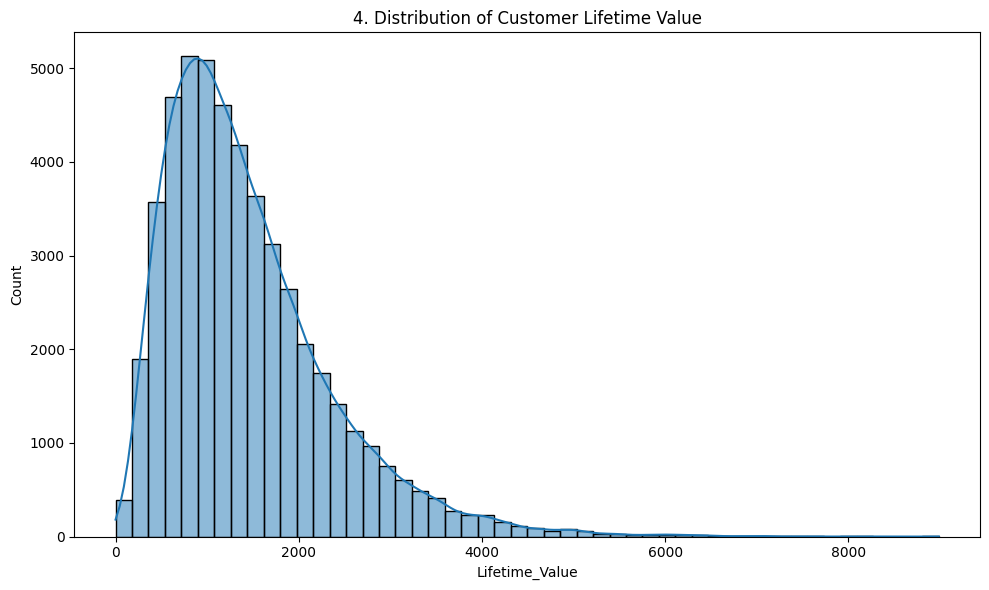

In [20]:
fig = plt.figure(figsize=(10,6))
sns.histplot(df['Lifetime_Value'], bins=50, kde=True)
plt.title(f'{plot_no}. Distribution of Customer Lifetime Value')
show_fig()
plot_no += 1


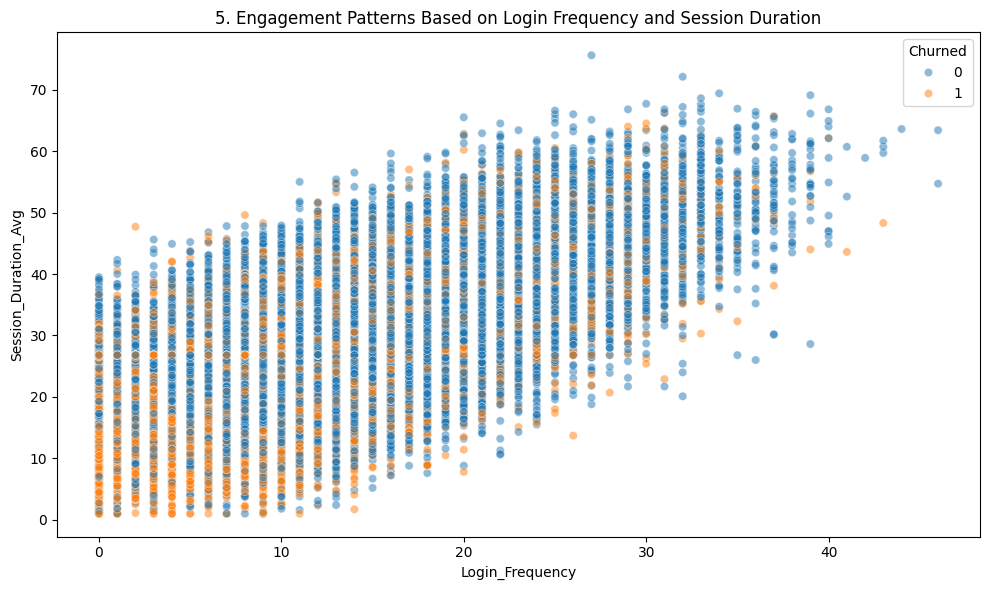

In [21]:
fig = plt.figure(figsize=(10,6))
sns.scatterplot(x='Login_Frequency', y='Session_Duration_Avg', hue='Churned', data=df, alpha=0.5)
plt.title(f'{plot_no}. Engagement Patterns Based on Login Frequency and Session Duration')
show_fig()
plot_no += 1


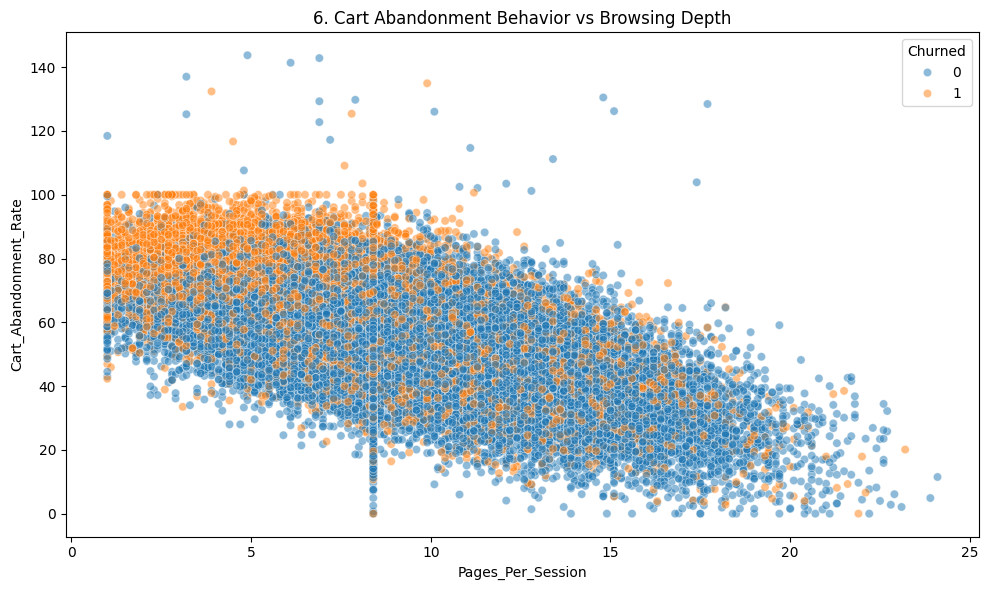

In [22]:
fig = plt.figure(figsize=(10,6))
sns.scatterplot(x='Pages_Per_Session', y='Cart_Abandonment_Rate', hue='Churned', data=df, alpha=0.5)
plt.title(f'{plot_no}. Cart Abandonment Behavior vs Browsing Depth')
show_fig()
plot_no += 1


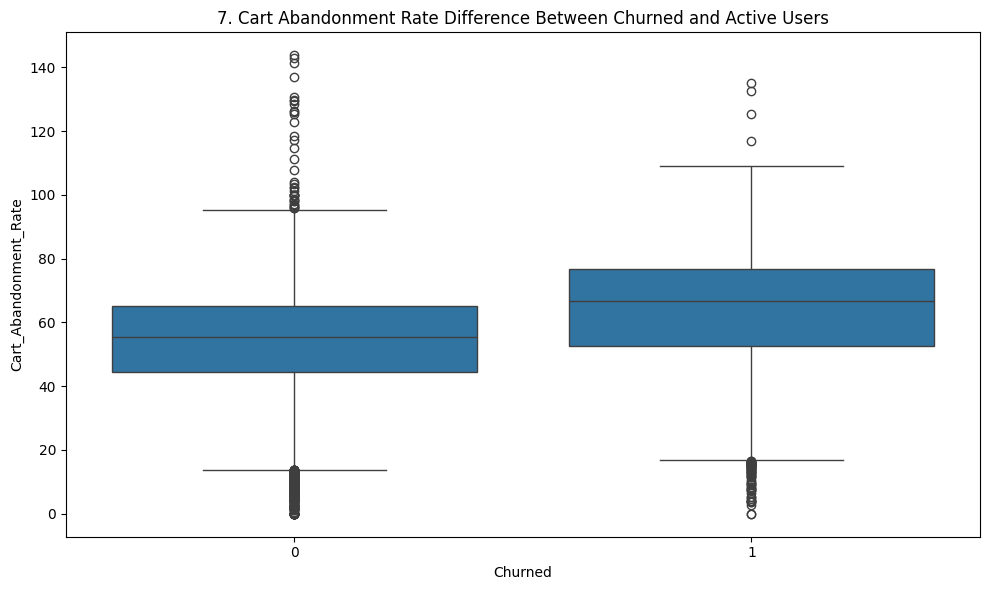

In [23]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(x='Churned', y='Cart_Abandonment_Rate', data=df)
plt.title(f'{plot_no}. Cart Abandonment Rate Difference Between Churned and Active Users')
show_fig()
plot_no += 1


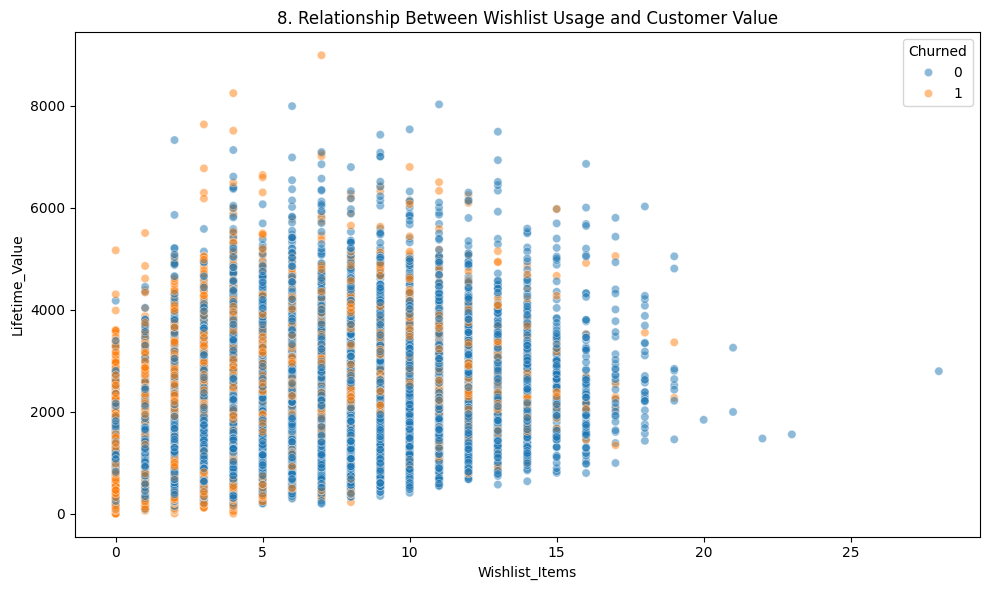

In [24]:
fig = plt.figure(figsize=(10,6))
sns.scatterplot(x='Wishlist_Items', y='Lifetime_Value', hue='Churned', data=df, alpha=0.5)
plt.title(f'{plot_no}. Relationship Between Wishlist Usage and Customer Value')
show_fig()
plot_no += 1


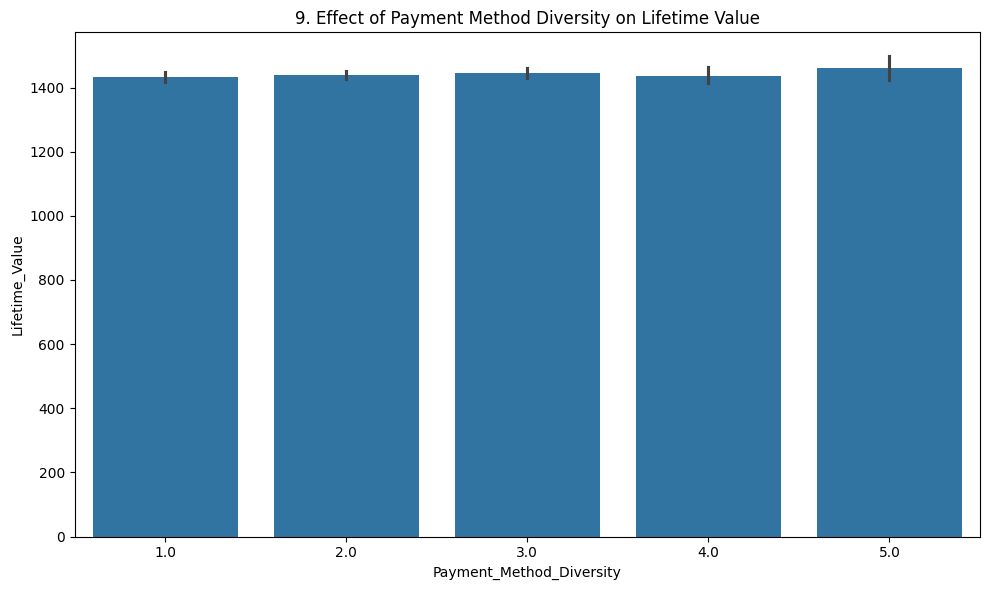

In [25]:
fig = plt.figure(figsize=(10,6))
sns.barplot(x='Payment_Method_Diversity', y='Lifetime_Value', data=df)
plt.title(f'{plot_no}. Effect of Payment Method Diversity on Lifetime Value')
show_fig()
plot_no += 1


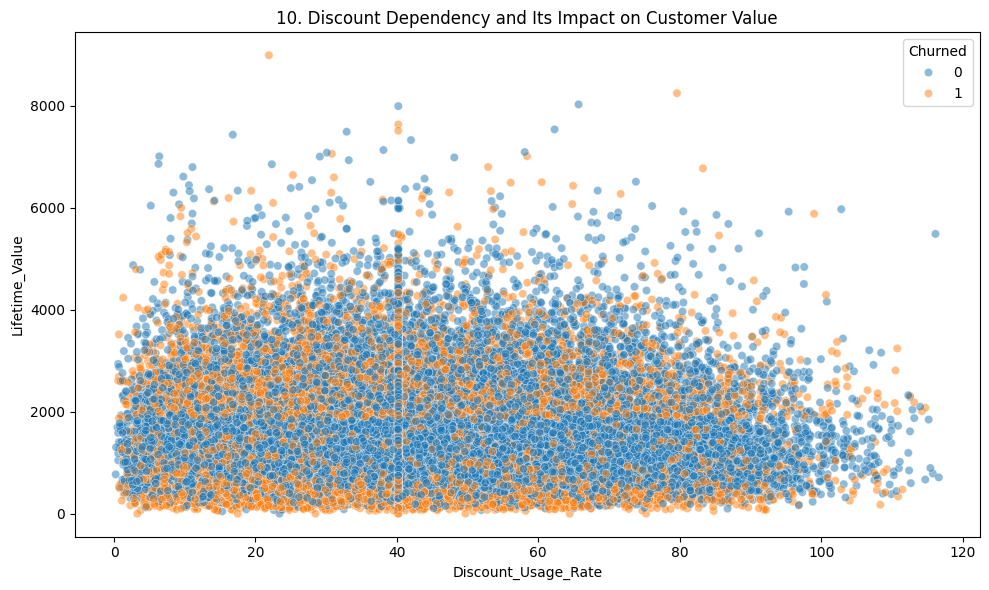

In [26]:
fig = plt.figure(figsize=(10,6))
sns.scatterplot(x='Discount_Usage_Rate', y='Lifetime_Value', hue='Churned', data=df, alpha=0.5)
plt.title(f'{plot_no}. Discount Dependency and Its Impact on Customer Value')
show_fig()
plot_no += 1


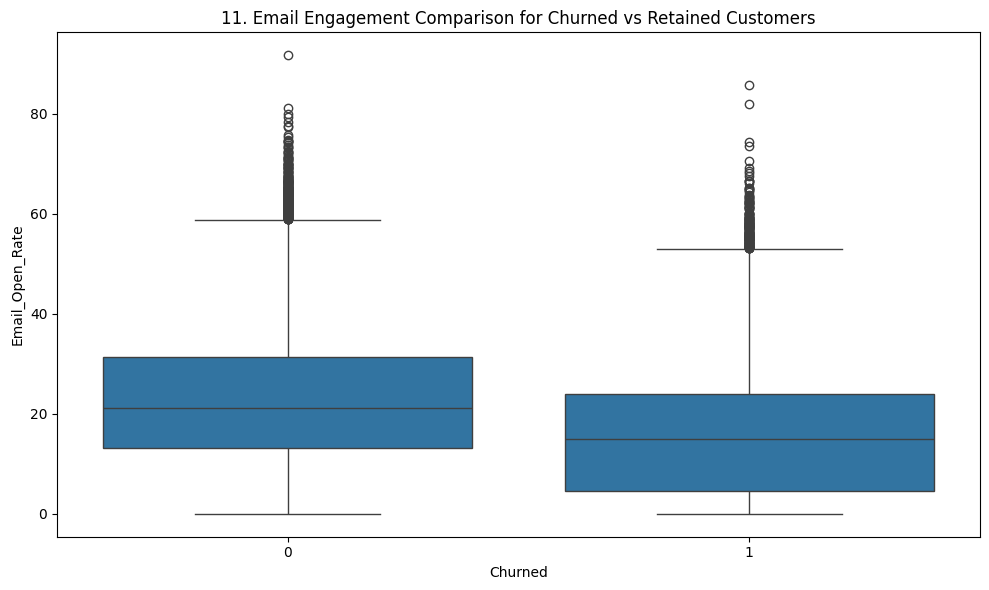

In [27]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(x='Churned', y='Email_Open_Rate', data=df)
plt.title(f'{plot_no}. Email Engagement Comparison for Churned vs Retained Customers')
show_fig()
plot_no += 1


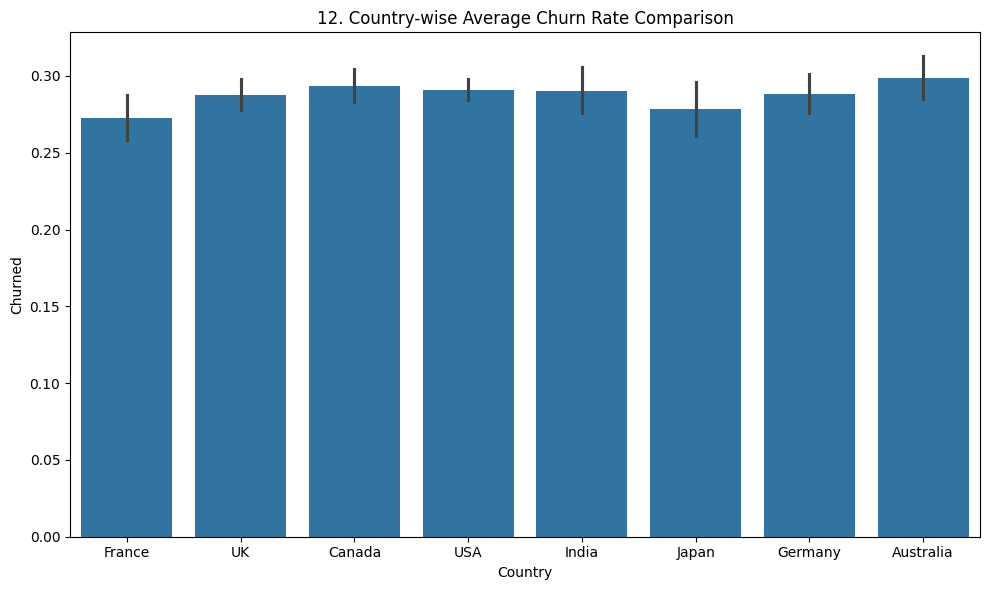

In [28]:
fig = plt.figure(figsize=(10,6))
sns.barplot(x='Country', y='Churned', data=df)
plt.title(f'{plot_no}. Country-wise Average Churn Rate Comparison')
show_fig()
plot_no += 1


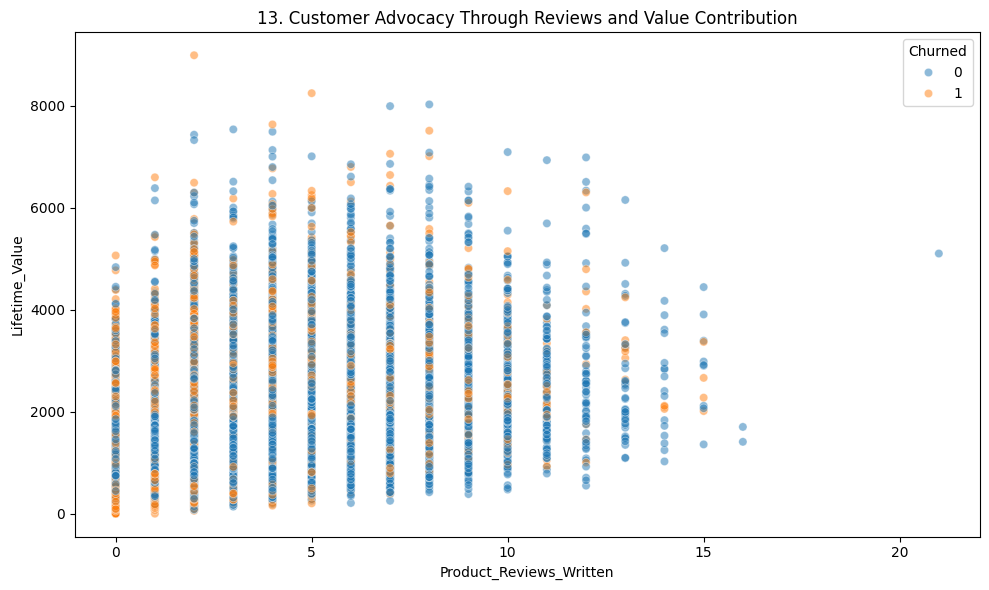

In [29]:
fig = plt.figure(figsize=(10,6))
sns.scatterplot(x='Product_Reviews_Written', y='Lifetime_Value', hue='Churned', data=df, alpha=0.5)
plt.title(f'{plot_no}. Customer Advocacy Through Reviews and Value Contribution')
show_fig()
plot_no += 1


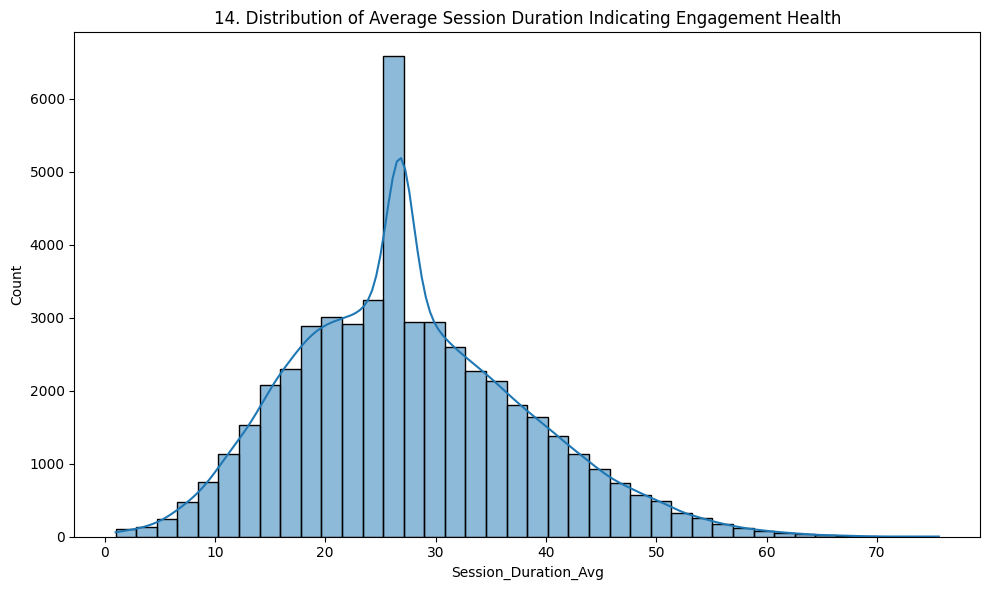

In [30]:
fig = plt.figure(figsize=(10,6))
sns.histplot(df['Session_Duration_Avg'], bins=40, kde=True)
plt.title(f'{plot_no}. Distribution of Average Session Duration Indicating Engagement Health')
show_fig()
plot_no += 1


# Model Training

## Select Fetures and Target

In [31]:
X = df.drop('Churned', axis=1)
y = df['Churned']

## Saperate Object and Numeric Features

In [32]:
cat_cols = X.select_dtypes(include='object').columns
num_cols = X.select_dtypes(exclude='object').columns

## Transformer Column

In [33]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)

## Split data in 80:20 Ratio

In [34]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

## Create GradentBoostingClassifier Model

In [35]:
model = GradientBoostingClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)

## Create Pipeline

In [36]:
pipeline = Pipeline(
    steps=[
        ('preprocessing', preprocessor),
        ('model', model)
    ]
)

## Train Pipeline

In [37]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  Index(['Age', 'Membership_Years', 'Login_Frequency', 'Session_Duration_Avg',
       'Pages_Per_Session', 'Cart_Abandonment_Rate', 'Wishlist_Items',
       'Total_Purchases', 'Average_Order_Value', 'Days_Since_Last_Purchase',
       'Discount_Usage_Rate', 'Returns_Rate', 'Email_Open_Rate',
       'Customer_Service_Calls', 'Product_Reviews_Written',
       'Payment_Method_Diversity', 'Lifetime_Value'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Gender', 'Country', 'City', 'Signup_Quarter'], dtype='object'))])),
                ('model',
                 GradientBoostingClassifier(learning_rate=0.05,
                                            n_estimators=300,
                                            random_state=42))])

## give 20% Tested data to check Accureccy

In [38]:
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred) * 100
accuracy

92.06

In [ ]:
# so we can say that our model accuracy is 92%

## Confusion Matrix

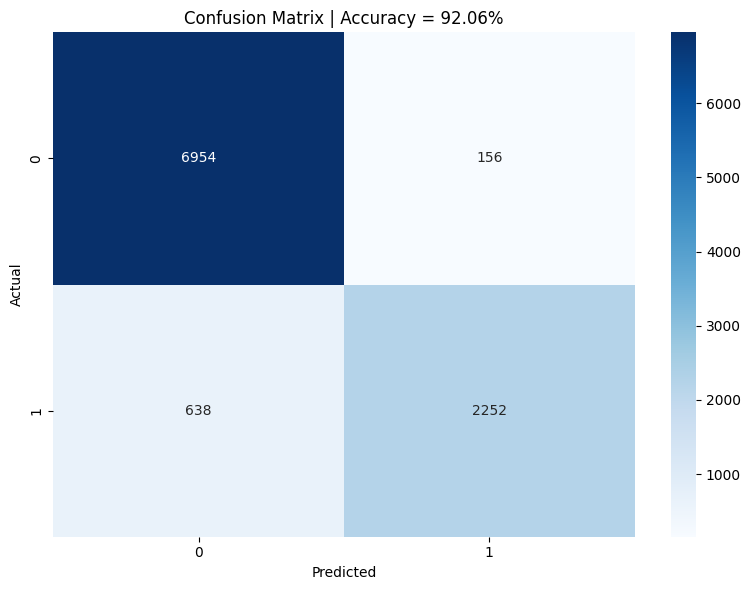

In [40]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix | Accuracy = {accuracy:.2f}%')
plt.tight_layout()
plt.show()